<a href="https://colab.research.google.com/github/kaazima/Bank-Personal-Loan-Classification/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submitted by:

Name   : Mirza Kaazima Ifrah

Reg No : BL.EN.U4CSE18073 

## Bank Personal Loan Classification

Universal bank is a small but growing bank. The majority of customers are liability, or deposit only customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing campaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.

## Business Question

Can we predict which new customers are most likely to say yes to a personal loan?

## Import Necessary packages

In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset Analysis

In [2]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


In [5]:
bank_df['Personal Loan'].value_counts().rename_axis('Personal Loan').to_frame('No of customers')

,No of customers
Personal Loan,
0,4520
1,480


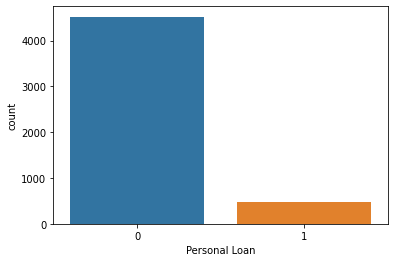

In [6]:
sns.countplot(bank_df['Personal Loan'])



*   90.4% of the total customers take personal loan
*   9.6% of the total customers do not take personal loan
*   So, the dataset is skewed and we need to deal with this imbalanced dataset



## Split dataset into train & test

In [7]:
feature = bank_df.copy().drop('Personal Loan', axis=1)
target = bank_df['Personal Loan']

In [8]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=5, test_size=0.20)

In [9]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


## Naive Bayes Classifier

In [10]:
# Create Naive Bayes object
naive_bayes = GaussianNB()

In [11]:
t = time()
# Train the model
naive_bayes.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.008 s


In [12]:
# Predict train data set
pred_train = naive_bayes.predict(x_train)
# Predict test data set
pred_test = naive_bayes.predict(x_test)

In [13]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.8835
Accuracy on test is: 0.885


In [14]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.7688053097345132


In [15]:
# list the default parameters of the model
naive_bayes.get_params()

{'priors': None, 'var_smoothing': 1e-09}

## Hyper Parameter Tuning

In [16]:
# List hyper parameters that we wish to tune
# Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation
# np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples
params = {'var_smoothing': [1e-09, 1e-10, np.logspace(0,-9, num=100)]}
# Use grid search
grid = GridSearchCV(naive_bayes, verbose=1, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)

In [17]:
# Train the model
grid.fit(x_train, y_train)
print()

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished


In [18]:
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Score: 0.88425
Best Parameters: {'var_smoothing': 1e-09}


In [19]:
best_naive_bayes = grid.best_estimator_
# print best hyper parameters
print(best_naive_bayes)

GaussianNB(priors=None, var_smoothing=1e-09)


In [20]:
t = time()
# Train the model
best_naive_bayes.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.007 s


In [21]:
# Predict train data set
pred_train = best_naive_bayes.predict(x_train)
# Predict test data set
pred_test = best_naive_bayes.predict(x_test)

In [22]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.8835
Accuracy on test is: 0.885


#### Confusion matrix for Train data

In [23]:
# Print confusion matrix for train data
print(confusion_matrix(y_train, pred_train))

[[3315  301]
 [ 165  219]]


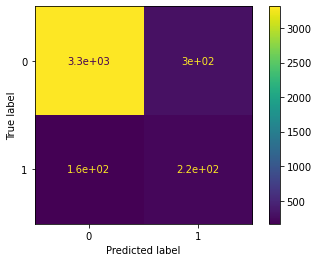

In [24]:
# Plot confusion matrix for train data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train), display_labels=grid.classes_).plot()

#### Confusion matrix for Test data

In [25]:
# Print confusion matrix for test data
print(confusion_matrix(y_test, pred_test))

[[825  79]
 [ 36  60]]


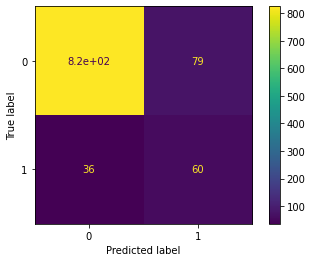

In [26]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test), display_labels=grid.classes_).plot()

#### Performance of our model

In [27]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       904
           1       0.43      0.62      0.51        96

    accuracy                           0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.89      1000



In [28]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.7688053097345132


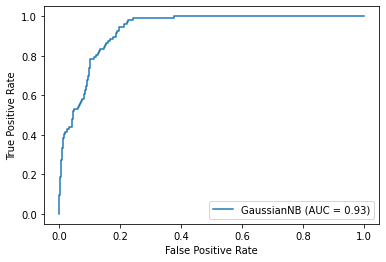

In [29]:
# Plot ROC Curve
plot_roc_curve(best_naive_bayes, x_test, y_test)

## Overall Analysis



*   This is an imbalanced dataset. So, I have used stratify parameter to preserve the proportion of target as in original dataset, in the train and test datasets as well. 

*   Preprocessing the data to obtain 0 mean and unit variance gave no improvement in the performance of the model. So, I did not use StandardScaler for this model.

*   Also, hyper parameter tuning showed no improvement in the model performance. So default parameters give the best performance.

*   As per the results, accuracy is 0.89. But, it can be observed that f1-score is 0.51 for class 1, which shows that our dataset is skewed. So, instead of considering accuracy as our metric, we need to consider ROC_AUC score for highly skewed datasets.

*   So, in order to deal with this imbalanced dataset, we can further upsample or downsample our dataset.

